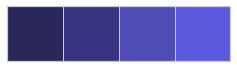

In [ ]:
import pandas as pd 
import numpy as np 
pd.set_option('display.max_columns', None) # code to display all columns

#
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date, datetime

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns

# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

# # set the color palette
# palette = sns.color_palette(["#292859",'#373482','#504DB6','#5B59DD'])
# sns.palplot(palette)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,hasCF,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,year,month,year_month,day
0,LL-I-00003578,5f079f3b9f0e103b6f5cc9f0c8b25dcd,B,478.67,2014-12-04 21:30:27.564,True,2014-12-05 15:28:07.491,1.0,True,1,Paid Off Loan,800.0,1919.28,OH,lead,25,Checked,0,3,False,2015-01-07 05:00:00.000,412.82,88.18,500.00,Checked,2014,December,December 2014,4
1,LL-I-00003578,5f079f3b9f0e103b6f5cc9f0c8b25dcd,B,478.67,2014-12-04 21:30:27.564,True,2014-12-05 15:28:07.491,1.0,True,1,Paid Off Loan,800.0,1919.28,OH,lead,25,Checked,0,8,False,2015-02-24 05:00:00.000,53.47,121.01,174.48,Cancelled,2014,December,December 2014,4
2,LL-I-00003578,5f079f3b9f0e103b6f5cc9f0c8b25dcd,B,478.67,2014-12-04 21:30:27.564,True,2014-12-05 15:28:07.491,1.0,True,1,Paid Off Loan,800.0,1919.28,OH,lead,25,Checked,0,9,False,2015-03-10 04:00:00.000,63.31,111.17,174.48,Cancelled,2014,December,December 2014,4
3,LL-I-00003578,5f079f3b9f0e103b6f5cc9f0c8b25dcd,B,478.67,2014-12-04 21:30:27.564,True,2014-12-05 15:28:07.491,1.0,True,1,Paid Off Loan,800.0,1919.28,OH,lead,25,Checked,0,10,False,2015-03-24 04:00:00.000,74.96,99.52,174.48,Cancelled,2014,December,December 2014,4
4,LL-I-00003578,5f079f3b9f0e103b6f5cc9f0c8b25dcd,B,478.67,2014-12-04 21:30:27.564,True,2014-12-05 15:28:07.491,1.0,True,1,Paid Off Loan,800.0,1919.28,OH,lead,25,Checked,0,11,False,2015-04-07 04:00:00.000,88.77,85.71,174.48,Cancelled,2014,December,December 2014,4


In [ ]:
df[['applicationDate', 'originatedDate', 'paymentDate']] = df[['applicationDate', 'originatedDate', 'paymentDate']].apply(pd.to_datetime)
df.dtypes

loanId                                      object
anon_ssn                                    object
payFrequency                                object
apr                                        float64
applicationDate                     datetime64[ns]
originated                                    bool
originatedDate                      datetime64[ns]
nPaidOff                                   float64
approved                                      bool
isFunded                                     int64
loanStatus                                  object
loanAmount                                 float64
originallyScheduledPaymentAmount           float64
state                                       object
leadType                                    object
leadCost                                     int64
fpStatus                                    object
hasCF                                        int64
installmentIndex                             int64
isCollection                   

In [ ]:
df_nan = df.isna().sum()

print(df_nan)

loanId                              0
anon_ssn                            0
payFrequency                        0
apr                                 0
applicationDate                     0
originated                          0
originatedDate                      0
nPaidOff                            0
approved                            0
isFunded                            0
loanStatus                          0
loanAmount                          0
originallyScheduledPaymentAmount    0
state                               0
leadType                            0
leadCost                            0
fpStatus                            0
hasCF                               0
installmentIndex                    0
isCollection                        0
paymentDate                         0
principal                           0
fees                                0
paymentAmount                       0
paymentStatus                       0
year                                0
month       

In [ ]:
## create a subset df
## excluding 'state' to make it more feasible

subset = df[['loanStatus', 'loanAmount', 'leadType', 
             'paymentAmount', 'paymentStatus', 'month', 'year']]

subset.head()

,loanStatus,loanAmount,leadType,paymentAmount,paymentStatus,month,year
0,Paid Off Loan,800.0,lead,500.00,Checked,December,2014
1,Paid Off Loan,800.0,lead,174.48,Cancelled,December,2014
2,Paid Off Loan,800.0,lead,174.48,Cancelled,December,2014
3,Paid Off Loan,800.0,lead,174.48,Cancelled,December,2014
4,Paid Off Loan,800.0,lead,174.48,Cancelled,December,2014


In [ ]:
subset.describe()

,loanAmount,paymentAmount,year,Clusters
count,671275.000000,671275.000000,671275.000000,671275.000000
mean,681.929332,112.421473,2016.011958,1.163616
std,576.883609,104.692433,0.704073,1.048549
min,100.000000,-337.700000,2014.000000,0.000000
25%,375.000000,56.810000,2016.000000,0.000000
50%,500.000000,86.340000,2016.000000,1.000000
75%,700.000000,135.050000,2017.000000,2.000000
max,4687.000000,4063.600000,2017.000000,3.000000


- Creating pipeline to scale numerical values (Standard Scalar)
- Creating pipeline to convert Categorical data to Encode (OrdinalEncoder)
- Creating pipeline to convert Nominal (if any) (OneHotEncoder)

In [ ]:

# Importing essential libraries for bulding pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
num_cols = ['loanAmount','paymentAmount', 'year']
numeric_pipeline = make_pipeline(StandardScaler())

In [ ]:
# Ordinal is used on inheritable dataset/type. Education level, month etc

ord_cols = ['month']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['January','February','March', 
                                                             'April', 'May', 'June', 'July', 
                                                             'August', 'September', 'October', 
                                                             'November', 'December']]))

In [ ]:
# nominal is used for non-inheritable categories. Loan types etc

nom_cols = ['loanStatus', 'paymentStatus']
nominal_pipeline = make_pipeline(OneHotEncoder())

In [ ]:
# stack your pipelines in column transformer
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])

In [ ]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['loanAmount', 'paymentAmount', 'year']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['January',
                                                                              'February',
                                                                              'March',
                                                                              'April',
                                                                              'May',
                                                                              'June',
                                                                              'July',
                        

In [ ]:
transformed = transformer.fit_transform(subset)
print('Data has been Transformed')

Data has been Transformed


## Finding the elbow

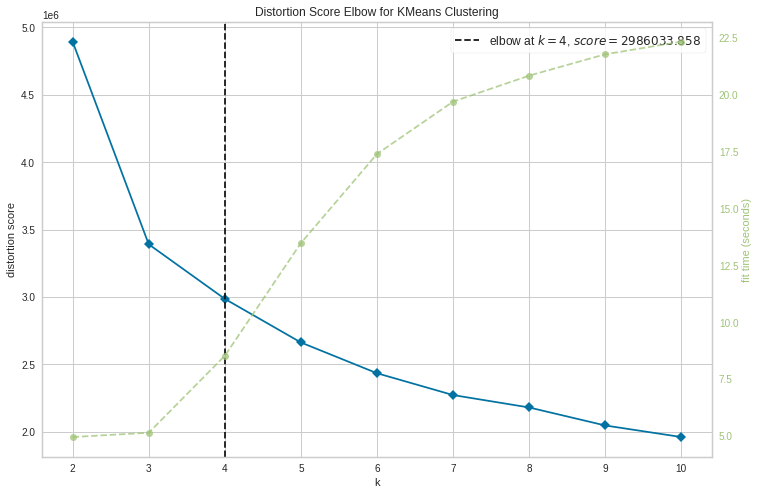

In [ ]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()

Algorithm suggest k=4, therefore, adding more clusters beyond 4 does not lead to a significant improvement in clustering performance.

In [ ]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed)

In [ ]:
subset

,loanStatus,loanAmount,leadType,paymentAmount,paymentStatus,month,year,Clusters
0,Paid Off Loan,800.0,lead,500.00,Checked,December,2014,0
1,Paid Off Loan,800.0,lead,174.48,Cancelled,December,2014,0
2,Paid Off Loan,800.0,lead,174.48,Cancelled,December,2014,0
3,Paid Off Loan,800.0,lead,174.48,Cancelled,December,2014,0
4,Paid Off Loan,800.0,lead,174.48,Cancelled,December,2014,0
...,...,...,...,...,...,...,...,...
671270,New Loan,500.0,lead,63.29,None,March,2017,1
671271,New Loan,500.0,lead,63.29,None,March,2017,1
671272,New Loan,500.0,lead,63.29,None,March,2017,1
671273,New Loan,500.0,lead,63.29,None,March,2017,1


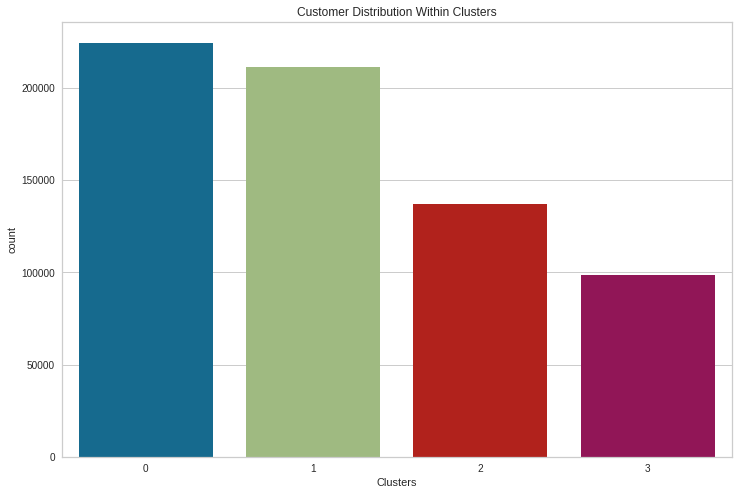

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=subset)
plt.title('Customer Distribution Within Clusters')
plt.show()

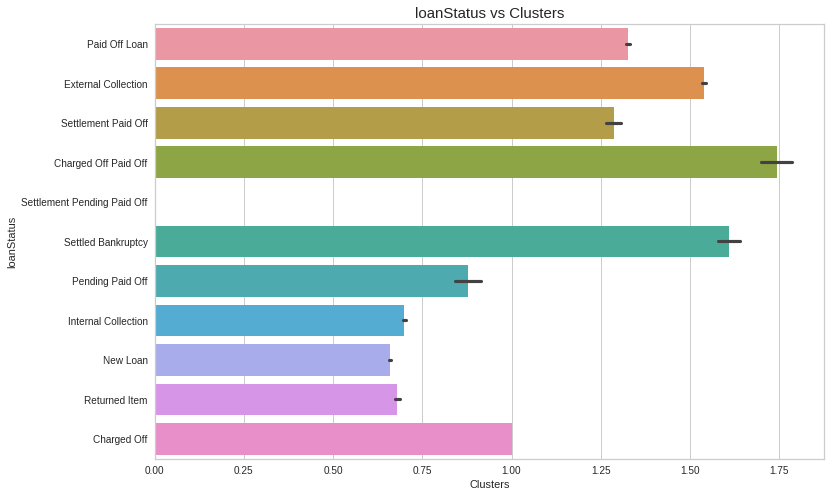

In [ ]:
# Find out the customers which belongs to which loanStatus
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["loanStatus"])
plt.title("loanStatus vs Clusters", size=15)
plt.show()

### EXAMPLE ## this cannot be done because loanStatus is not numerical.
## for ordinal, need to use stacked barplot

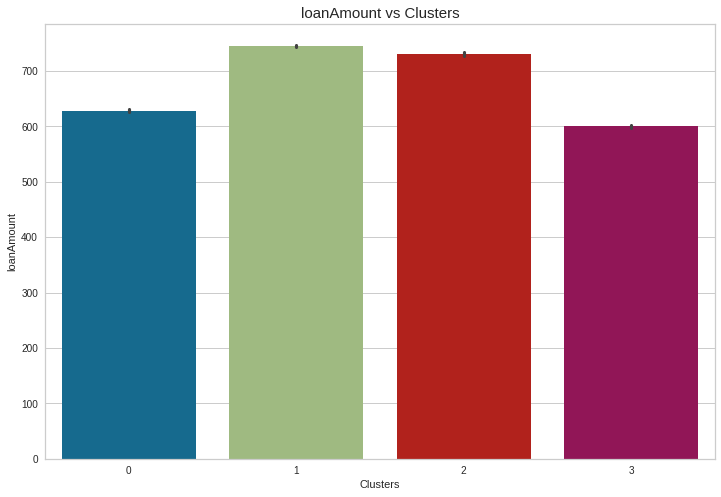

In [ ]:
# Find out the customers which belongs to which loanAmount
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["loanAmount"])
plt.title("loanAmount vs Clusters", size=15)
plt.show()

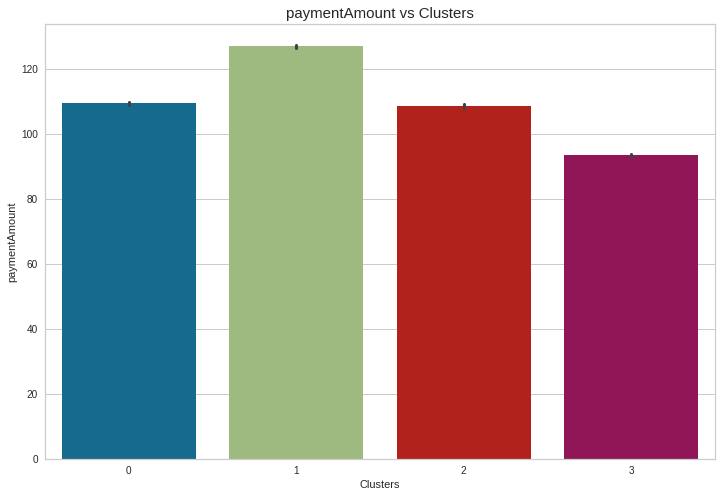

In [ ]:
# Find out the customers which belongs to which paymentAmount
plt.figure(figsize=(12, 8))
sns.barplot(x=subset["Clusters"], y=subset["paymentAmount"])
plt.title("paymentAmount vs Clusters", size=15)
plt.show()

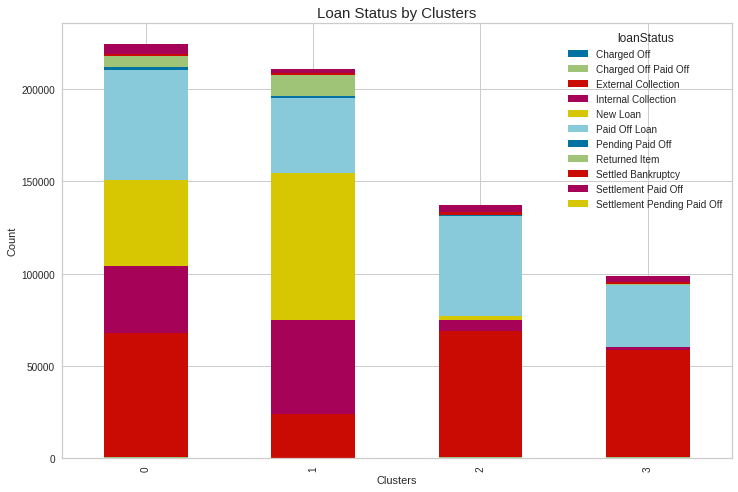

In [ ]:
# Count the number of customers for each loanStatus within each cluster
cross_tab = pd.crosstab(subset['Clusters'], subset['loanStatus'])

# Create a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(12,8))

# Add labels and title
plt.title("Loan Status by Clusters", size=15)
plt.xlabel("Clusters")
plt.ylabel("Count")
plt.show()

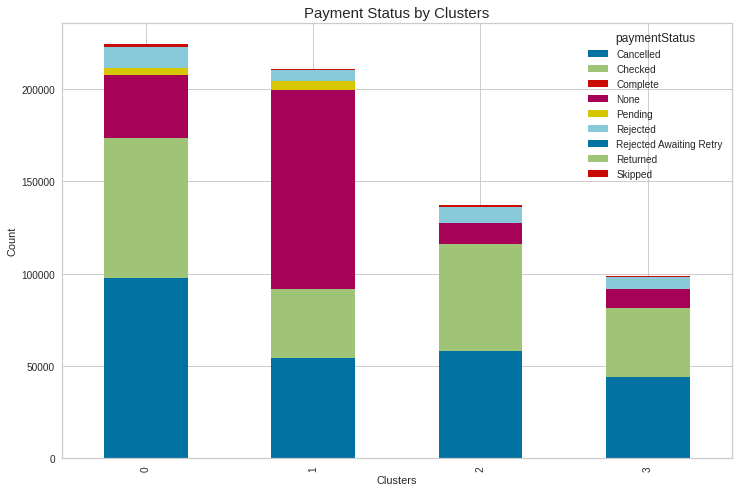

In [ ]:
# Count the number of customers for each paymentStatus within each cluster
cross_tab2 = pd.crosstab(subset['Clusters'], subset['paymentStatus'])

# Create a stacked bar chart
cross_tab2.plot(kind='bar', stacked=True, figsize=(12,8))

# Add labels and title
plt.title("Payment Status by Clusters", size=15)
plt.xlabel("Clusters")
plt.ylabel("Count")
plt.show()


In [ ]:
%%shell
jupyter nbconvert --to html ////content/Akmal_customer_profile.ipynb

[NbConvertApp] Converting notebook ////content/Akmal_customer_profile.ipynb to html
[NbConvertApp] Writing 565893 bytes to ////content/Akmal_customer_profile.html
